# Info
Name:  

    KORUS_AOD_comp

Purpose:  

    Comparison of AOD from 4STAR along flight track and GOCI aerosol
    Additional calculations of the aerosol extinction profile
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - load_utils.py : for loading OMI HDF5 files
    - matplotlib
    - numpy
    - scipy : for saving and reading
    - pytables
    - os
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - ...
  
Modification History:

    Written: Samuel LeBlanc, OSAN AFB, Korea, 2016-05-06
    Modified: 

# Import the required modules and set up base

In [164]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import scipy.io as sio
import Sp_parameters as Sp
import tables
import load_utils as lm
import hdf5storage as hs
import os

In [165]:
from mpl_toolkits.basemap import Basemap,cm
%matplotlib notebook
fp = 'C:/Users/sleblan2/Research/KORUS-AQ/'

# Load the various data

## Load the 4STAR starsun

In [33]:
f_star = fp+'data\\20160504starsun.mat'

In [34]:
s = sio.loadmat(f_star)

In [35]:
s.keys()

['Str',
 'tau_O3_err',
 'sza',
 'm_ray',
 'toggle',
 'pitch',
 'Tst',
 'fwhm',
 'nirt',
 'tau_aero_noscreening',
 'rateaero',
 'O3h',
 'NO2col',
 'Headng',
 'RH',
 'Pst',
 'nirheader',
 'sd_aero_crit',
 'dark',
 'nirVdettemp',
 'Elstep',
 'tau_ray',
 'nircols',
 'sunaz',
 'O3col',
 'nirfilen',
 'f',
 'tau_O4_err',
 't',
 'c0mod',
 'tau_tot_slant',
 'rate',
 'program_version',
 'sat_time',
 'm_O3',
 'visheader',
 'nirTint',
 'filename',
 'tau_r_err',
 'nirsat_pixel',
 'Md',
 'aeronetcols',
 'rateslant',
 'visAVG',
 'tau_NO2_err',
 'Zn',
 'AZstep',
 'darkstd',
 'QdVtot',
 'nirAVG',
 'w',
 'ELcorr',
 'visVdettemp_C',
 'El_deg',
 'skyresp',
 'Lon',
 'tau_aero',
 'AZ_deg',
 'visrow_labels',
 'm_H2O',
 'c0err',
 'viscols',
 'tau_CO2_CH4_N2O_abserr',
 'aerosolcols',
 'tau_O3',
 'vissat_pixel',
 'tau_O4',
 'tau_NO2',
 'tau_aero_polynomial',
 'ratetot',
 'visfilen',
 'c0',
 'Tprecon_C',
 'raw',
 '__header__',
 'rawcorr',
 'sat_ij',
 'sunel',
 'visTint',
 'Tbox_C',
 'QdVtb',
 'QdVlr',
 'nirVdett

In [45]:
s['utc'] = lm.toutc(lm.mat2py_time(s['t']))

In [31]:
s['tau_aero'].shape

(22791L, 1556L)

## Load the GOCI aerosol products

In [3]:
f_goci = fp+'sat/GOCI/GOCI_YAER_AOP_20160505041644.hdf'

In [15]:
gg,gg_head = lm.load_hdf(f_goci,values=(('lon',0),('lat',1),('aod550',2),('fmf550',3),('ssa440',4),('type',5),('ang',6),('QA',7),
                                ('obs_time',8),('cf',9),('turbidI',10),('Land_sea_mask',11)))

Outputting the Data subdatasets:
0: [473x463] Longitude (32-bit floating-point)
1: [473x463] Latitude (32-bit floating-point)
2: [473x463] AOD_550nm (32-bit floating-point)
3: [473x463] FMF_550nm (32-bit floating-point)
4: [473x463] SSA_440nm (32-bit floating-point)
5: [473x463] Type (32-bit floating-point)
6: [473x463] Angstrom_Exponent_440_870nm (32-bit floating-point)
7: [473x463] QA_AOD_550nm (32-bit floating-point)
8: [473x463] Observation_time_minute (32-bit floating-point)
9: [473x463] Cloud_fraction (32-bit floating-point)
10: [473x463] Turbid_index (32-bit floating-point)
11: [473x463] Land_Sea_Mask (32-bit floating-point)
Running through data values: [----------------------------------------] 00% *** FillValue not used to replace NANs, will have to do manually ***
Running through data values: [----------------------------------------] 00%*** FillValue not used to replace NANs, will have to do manually ***
Running through data values: [###-------------------------------------]

In [57]:
gg_head

{'Land_sea_mask': {'_FillValue': '1.#QNAN',
  'add_offset': '0',
  'scale_factor': '1',
  'valid_range': '0, 1'},
 'QA': {'_FillValue': '1.#QNAN',
  'add_offset': '0',
  'scale_factor': '1',
  'valid_range': '0, 3'},
 'ang': {'_FillValue': '1.#QNAN',
  'add_offset': '0',
  'scale_factor': '1',
  'valid_range': '0, 5'},
 'aod550': {'_FillValue': '1.#QNAN',
  'add_offset': '0',
  'scale_factor': '1',
  'valid_range': '-1, 5'},
 'cf': {'_FillValue': '1.#QNAN',
  'add_offset': '0',
  'scale_factor': '1',
  'valid_range': '0, 1'},
 'fmf550': {'_FillValue': '1.#QNAN',
  'add_offset': '0',
  'scale_factor': '1',
  'valid_range': '0, 1'},
 'lat': {'_FillValue': '1.#QNAN',
  'add_offset': '0',
  'scale_factor': '1',
  'valid_range': '-90, 90'},
 'lon': {'_FillValue': '1.#QNAN',
  'add_offset': '0',
  'scale_factor': '1',
  'valid_range': '-180, 180'},
 'obs_time': {'_FillValue': '0',
  'add_offset': '0',
  'scale_factor': '1',
  'valid_range': '0, 59.99000168'},
 'ssa440': {'_FillValue': '1.#QN

## Get the AERONET data to overlay on plot

In [163]:
fp

'C:/Users/sleblan2/Research/KORUS-AQ/'

In [191]:
reload(lm)

<module 'load_utils' from 'load_utils.py'>

In [183]:
fa = fp+'aeronet/AOT/LEV10/ALL_POINTS/'
fa_l = os.listdir(fa)

In [192]:
aero = []
for f in fa_l:
    aero.append(lm.load_aeronet(fa+f))

Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Anmyon.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_AOE_Baotou.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Baengnyeong.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Beijing-CAMS.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Beijing.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Beijing_RADI.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Chiba_University.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Fukuoka.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Gangneung_WNU.lev10
Openin

In [194]:
aero[0].keys()

['AOT_551',
 'TripletVar_532',
 'AOT_532',
 'AOT_667',
 'AOT_531',
 'TripletVar_412',
 '440675AngstromPolar',
 'AOT_1640',
 'WaterError',
 'AOT_380',
 '500870Angstrom',
 'Dateddmmyy',
 'AOT_412',
 'Email',
 'AOT_555',
 'AOT_490',
 'TripletVar_1640',
 'Solar_Zenith_Angle',
 'Last_Processing_Dateddmmyyyy',
 '340440Angstrom',
 'TripletVar_340',
 'AOT_675',
 'TripletVar_531',
 'TripletVar_380',
 'TripletVar_440',
 'TripletVar_500',
 '380500Angstrom',
 'AOT_443',
 'AOT_440',
 'TripletVar_667',
 '440675Angstrom',
 'Timehhmmss',
 'TripletVar_675',
 'Julian_Day',
 'TripletVar_1020',
 'TripletVar_870',
 'TripletVar_443',
 'Watercm',
 'AOT_500',
 'AOT_1020',
 'header',
 '440870Angstrom',
 'AOT_870',
 'TripletVar_490',
 'TripletVar_551',
 'AOT_340',
 'TripletVar_555']

# Start making different plots/maps

In [17]:
#set up a easy plotting function
def make_map(ax=plt.gca()):
    m = Basemap(projection='stere',lon_0=128,lat_0=36.0,
            llcrnrlon=123.0, llcrnrlat=33.5,
            urcrnrlon=132.0, urcrnrlat=39,resolution='h',ax=ax)
    m.drawcoastlines()
    #m.fillcontinents(color='#AAAAAA')
    m.drawstates()
    m.drawcountries()
    m.drawmeridians(np.linspace(123,133,11),labels=[0,0,0,1])
    m.drawparallels(np.linspace(33,39,13),labels=[1,0,0,0])
    return m

## Start with simple map plot of GOCI

<IPython.core.display.Javascript object>


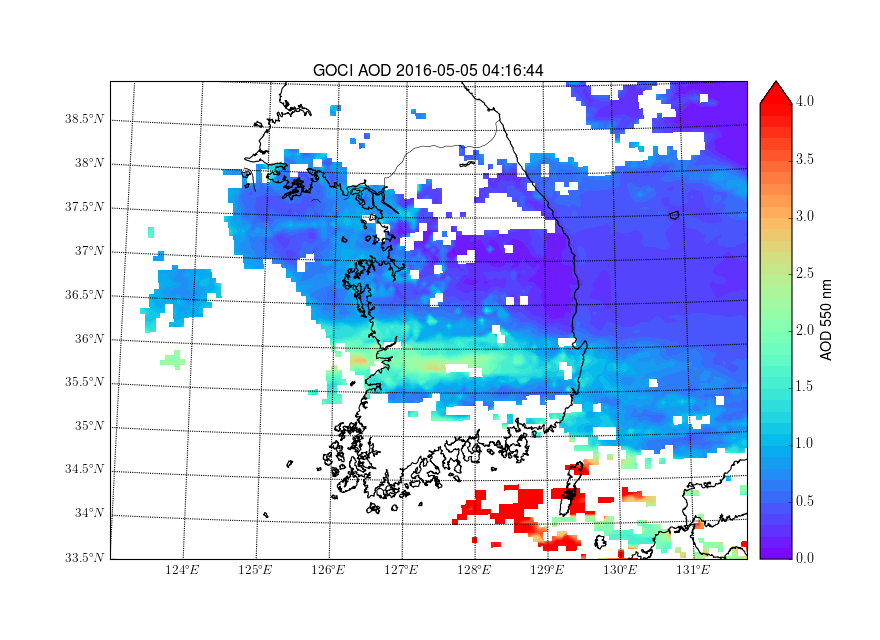

In [41]:
fig,ax = plt.subplots(1,1,figsize=(11,8))
m = make_map(ax)
x,y = m(gg['lon'],gg['lat'])
clevels = np.linspace(0,4,41)

plt.title('GOCI AOD 2016-05-05 04:16:44')
cs1 = m.contourf(x,y,gg['aod550'],clevels,cmap=plt.cm.rainbow,extend='max')
cbar = m.colorbar(cs1)
cbar.set_label('AOD 550 nm')

#xx,yy = m(star['lon'],star['lat'])
#m.scatter(xx,yy,c=star['tau'],cmap=plt.cm.rainbow,marker='o',vmin=clevels[0],vmax=clevels[-1],
#          alpha=0.5,edgecolors='k',linewidth=0.65)
plt.savefig(fp+'plot/20160505_GOCI_map_AOD.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


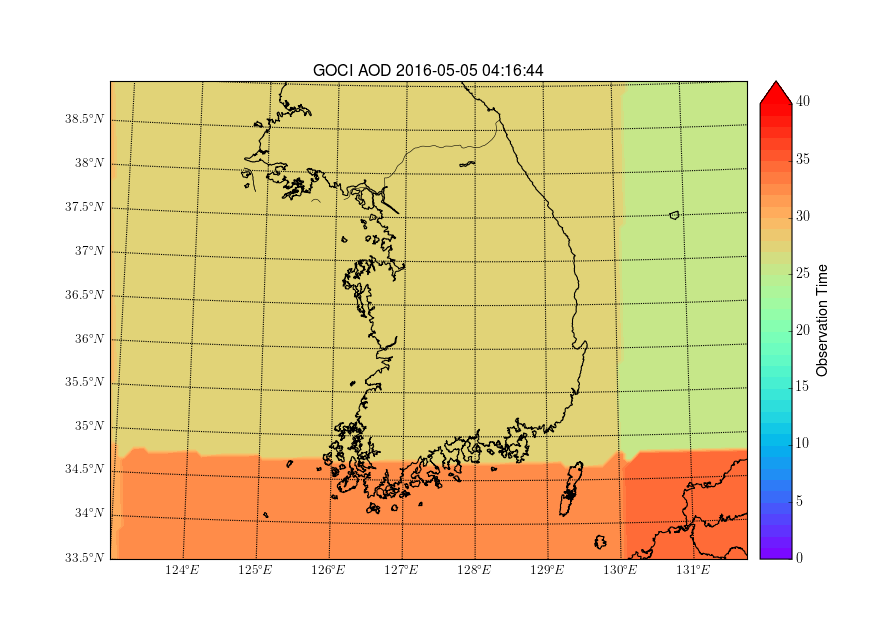

In [56]:
fig,ax = plt.subplots(1,1,figsize=(11,8))
m = make_map(ax)
x,y = m(gg['lon'],gg['lat'])
clevels = np.linspace(0,40,41)

plt.title('GOCI AOD 2016-05-05 04:16:44')
cs1 = m.contourf(x,y,gg['obs_time'],clevels,cmap=plt.cm.rainbow,extend='max')
cbar = m.colorbar(cs1)
cbar.set_label('Observation Time')


<IPython.core.display.Javascript object>


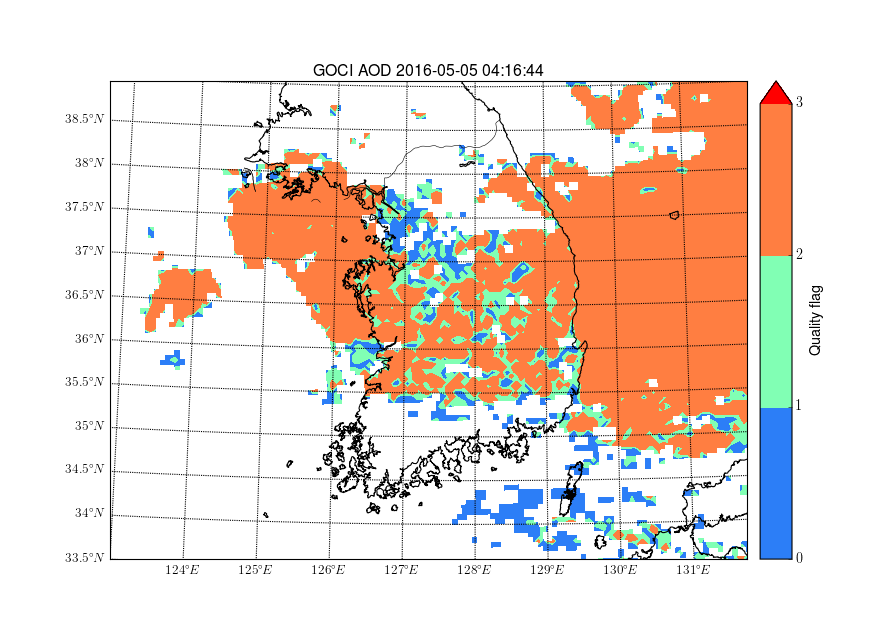

In [59]:
fig,ax = plt.subplots(1,1,figsize=(11,8))
m = make_map(ax)
x,y = m(gg['lon'],gg['lat'])
clevels = np.linspace(0,3,4)

plt.title('GOCI AOD 2016-05-05 04:16:44')
cs1 = m.contourf(x,y,gg['QA'],clevels,cmap=plt.cm.rainbow,extend='max')
cbar = m.colorbar(cs1)
cbar.set_label('Quality flag')

## Overlay 4STAR values

<IPython.core.display.Javascript object>


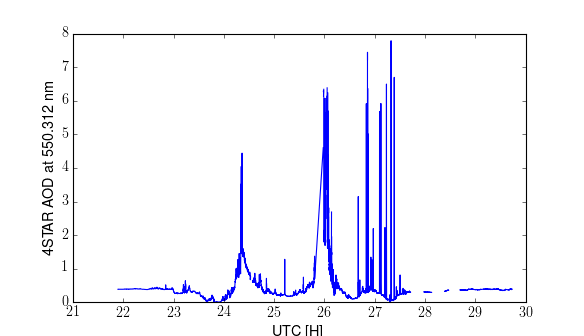

In [55]:
plt.figure()
plt.plot(s['utc'],s['tau_aero'][:,450])
plt.ylabel('4STAR AOD at {} nm'.format(s['w'][0][469]*1000.0))
plt.xlabel('UTC [H]')

In [61]:
ig = gg['QA']==3

In [62]:
ig.shape

(473L, 463L)

In [63]:
gg['aod550'].shape

(473L, 463L)

In [64]:
gg['aod550'][ig]=np.nan

<IPython.core.display.Javascript object>


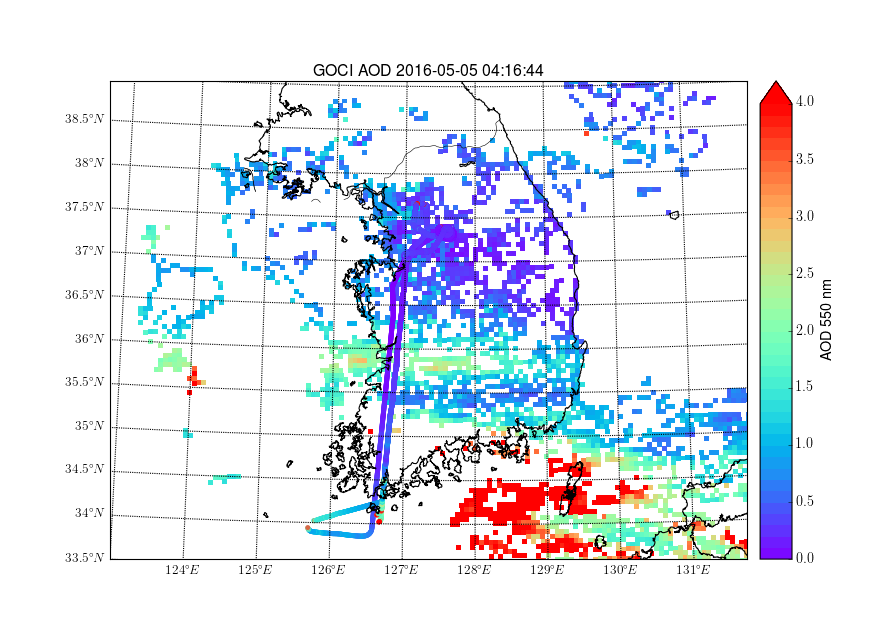

In [67]:
fig,ax = plt.subplots(1,1,figsize=(11,8))
m = make_map(ax)
x,y = m(gg['lon'],gg['lat'])
clevels = np.linspace(0,4,41)

plt.title('GOCI AOD 2016-05-05 04:16:44')
cs1 = m.contourf(x,y,gg['aod550'],clevels,cmap=plt.cm.rainbow,extend='max')
cbar = m.colorbar(cs1)
cbar.set_label('AOD 550 nm')
m.scatter(x,y,c=gg['aod550'],cmap=plt.cm.rainbow,marker='s',vmin=clevels[0],vmax=clevels[-1],edgecolors='None')


xx,yy = m(s['Lon'],s['Lat'])
m.scatter(xx,yy,c=s['tau_aero'][:,469],cmap=plt.cm.rainbow,marker='o',vmin=clevels[0],vmax=clevels[-1],
          alpha=0.5,edgecolors='None')
plt.savefig(fp+'plot/20160505_GOCI_4STAR_map_AOD.png',dpi=600,transparent=True)

#

In [69]:
fp

'C:/Users/sleblan2/Research/KORUS-AQ/'

In [70]:
fa = fp+'aeronet/AOT/LEV10/ALL_POINTS/160401_160731_SONET_Shanghai.lev10'